R Code pulled from https://www.statmethods.net/advgraphs/ggplot2.html

In [1]:
install.packages('randomForest')
require(randomForest)
library(rpart)
library(purrr)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [2]:
sd = sample(1:10000,1)
print(sd)

set.seed(sd)

# Test Set
ta <- runif(100, min = 0, max = 1)
tb <- runif(100, min = 0, max = 1)
tc <- runif(100, min = 0, max = 1)

test <- data.frame(cbind(ta,tb,tc))
colnames(test) <- c('A','B', 'C')

# Train Set
a <- runif(10000, min = 0, max = 1)
b <- runif(10000, min = 0, max = 1)
c <- runif(10000, min = 0, max = 1)

train <- data.frame(cbind(a,b,c))
colnames(train) <- c('A','B', 'C')

train$I <- train$A + train$B + train$C

eq <- I~A+B+C

[1] 6019


In [3]:
set.seed(sd)
model <- randomForest(eq,data=train,ntree=50,keep.inbag=T)

In [4]:
print(model)


Call:
 randomForest(formula = eq, data = train, ntree = 50, keep.inbag = T) 
               Type of random forest: regression
                     Number of trees: 50
No. of variables tried at each split: 1

          Mean of squared residuals: 0.001896752
                    % Var explained: 99.24


In [5]:
## INBAG: n by ntree matrix be returned that keeps track of which samples are “in-bag” in which trees
## But not how many times, if sampling with replacement (Default replace = TRUE)
print(model$inbag) ## 0 means OOB and 1-5 means which # of tree

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
1        0    1    1    2    3    1    0    2    1     1     1     0     1
2        0    1    1    1    0    1    1    2    0     5     1     2     2
3        2    1    3    3    0    3    1    1    0     0     1     1     1
4        2    0    2    2    3    0    0    0    0     1     2     2     3
5        2    0    2    1    0    1    1    0    1     3     1     0     3
6        0    0    1    0    2    0    0    0    2     0     1     0     0
7        1    0    1    3    2    1    0    2    1     0     4     0     1
8        3    1    0    1    2    2    0    0    0     0     1     1     0
9        0    0    1    0    1    0    2    1    2     1     3     2     1
10       0    3    0    0    1    0    3    1    0     0     1     2     1
11       4    2    0    1    2    0    0    0    0     0     0     1     1
12       0    0    0    1    1    2    1    0    2     1     2     1     4
13       2    1    1    1

In [6]:
outbag <- lapply(1:50, function(x) which(model[["inbag"]][ ,x] == 0)) ##keeping only the zeros

In [7]:
print(outbag)

[[1]]
   1    2    6    9   10   12   15   16   18   22   23   31   34   35   36   37 
   1    2    6    9   10   12   15   16   18   22   23   31   34   35   36   37 
  39   40   41   43   48   52   53   56   57   58   59   62   67   71   72   73 
  39   40   41   43   48   52   53   56   57   58   59   62   67   71   72   73 
  76   78   79   83   84   87   88   92   95   98  105  107  108  110  111  112 
  76   78   79   83   84   87   88   92   95   98  105  107  108  110  111  112 
 113  115  116  119  122  126  128  130  131  134  135  137  144  147  151  152 
 113  115  116  119  122  126  128  130  131  134  135  137  144  147  151  152 
 153  154  158  159  162  165  168  171  173  176  177  180  181  182  183  186 
 153  154  158  159  162  165  168  171  173  176  177  180  181  182  183  186 
 187  188  189  191  196  197  198  200  201  204  210  211  214  217  221  222 
 187  188  189  191  196  197  198  200  201  204  210  211  214  217  221  222 
 227  234  240  241  2

In [8]:
oobpred <- lapply(outbag, function(x) predict(model, train[x, ])) ## Out of bag predictions
#print(oobpred)

In [9]:
mae_function <- function(pred, actual) {
    mean(abs(pred-actual))
}

In [10]:
(oob_err <- map2_dbl(oobpred, outbag, function(x, y) mae_function(x, train[y, ]$I))) # Wi(obs) equation 5 Gajowniczek et.al (2020)
print(oob_err) ## For each tree

[1] 0.01496536 0.01481227 0.01467099 0.01501944 0.01484712 0.01502968
 [7] 0.01469588 0.01475838 0.01470204 0.01483824 0.01469457 0.01488668
[13] 0.01500894 0.01492891 0.01502435 0.01457275 0.01458262 0.01499577
[19] 0.01472995 0.01469722 0.01516122 0.01481668 0.01472840 0.01476614
[25] 0.01469253 0.01506242 0.01503458 0.01465024 0.01523736 0.01471460
[31] 0.01468310 0.01509027 0.01511722 0.01478878 0.01469310 0.01493841
[37] 0.01470398 0.01503775 0.01472485 0.01488868 0.01475723 0.01480766
[43] 0.01505424 0.01486400 0.01514702 0.01494127 0.01497171 0.01468717
[49] 0.01477930 0.01467705

 [1] 0.01496536 0.01481227 0.01467099 0.01501944 0.01484712 0.01502968
 [7] 0.01469588 0.01475838 0.01470204 0.01483824 0.01469457 0.01488668
[13] 0.01500894 0.01492891 0.01502435 0.01457275 0.01458262 0.01499577
[19] 0.01472995 0.01469722 0.01516122 0.01481668 0.01472840 0.01476614
[25] 0.01469253 0.01506242 0.01503458 0.01465024 0.01523736 0.01471460
[31] 0.01468310 0.01509027 0.01511722 0.01478878 0.01469310 0.01493841
[37] 0.01470398 0.01503775 0.01472485 0.01488868 0.01475723 0.01480766
[43] 0.01505424 0.01486400 0.01514702 0.01494127 0.01497171 0.01468717
[49] 0.01477930 0.01467705


In [11]:
plot_function <- function(pred, actual) {
    plot(pred,actual)
    lines(actual,actual)
}

In [12]:
#plots <- map2(oobpred, outbag, function(x, y) plot_function(x, train[y, ]$I))
## You can see the pathology here as well
## Can you used to get correction - Work in Progress

In [13]:
## Predicting Test set responses
pred <- predict(model, test, type="response", predict.all=TRUE)
print(pred$individual) #prediction from each tree ## pred$aggregate give simple average prediction 

         [,1]      [,2]      [,3]      [,4]      [,5]      [,6]      [,7]
1   1.3224902 1.0958729 1.1164733 1.1255990 1.1706304 1.1443541 1.1548643
2   1.6609544 1.6437604 1.6825659 1.6478622 1.6863145 1.6777724 2.0250329
3   1.5981339 1.5860147 1.5973817 1.4833632 1.6577168 1.2716718 1.6432156
4   1.7906651 1.7560870 1.7797053 1.7746300 1.8475143 1.5325999 1.6772396
5   0.8897845 0.8042367 0.8768910 1.0462966 0.7976115 0.8590773 0.8063158
6   1.3240729 1.5141917 1.6440761 1.5954022 1.7232601 1.4893343 1.7128915
7   2.0513160 1.8640517 1.9064227 1.9711728 1.9766082 1.6839552 1.6347119
8   1.6998892 1.5218580 1.5262721 1.5128989 1.6242926 1.5231336 1.5929987
9   1.1351829 1.1354447 1.0886124 1.0491341 1.1827693 1.0101642 1.1354447
10  1.3678036 1.5693503 1.6582705 1.7737551 1.6565880 1.5678697 1.5684638
11  2.6231308 2.8292124 2.8319356 2.6856750 2.8304574 2.5289816 2.6004921
12  1.8319788 1.5318036 1.7552458 1.6478622 1.7899643 1.7491456 1.6869373
13  1.8395154 1.9589654 2.3361464 1.96

In [14]:
## If I rank the tree based on MAE of OOB error for each tree, then I can use equation 9 of Gajowniczek et.al (2020) to calculate weights
Rank <- as.vector(rank(oob_err))
Tree <- c(1:5)
rankorder <- as.data.frame(cbind(Tree,Rank))

print(rankorder)

   Tree Rank
1     1   35
2     2   25
3     3    4
4     4   39
5     5   28
6     1   41
7     2   11
8     3   20
9     4   13
10    5   27
11    1   10
12    2   30
13    3   38
14    4   32
15    5   40
16    1    1
17    2    2
18    3   37
19    4   18
20    5   12
21    1   49
22    2   26
23    3   17
24    4   21
25    5    8
26    1   45
27    2   42
28    3    3
29    4   50
30    5   15
31    1    6
32    2   46
33    3   47
34    4   23
35    5    9
36    1   33
37    2   14
38    3   43
39    4   16
40    5   31
41    1   19
42    2   24
43    3   44
44    4   29
45    5   48
46    1   34
47    2   36
48    3    7
49    4   22
50    5    5


In [15]:
rankorder$Nominator <- (rankorder$Tree - rankorder$Rank + 1)^2 # equation 9
print(rankorder)

   Tree Rank Nominator
1     1   35      1089
2     2   25       484
3     3    4         0
4     4   39      1156
5     5   28       484
6     1   41      1521
7     2   11        64
8     3   20       256
9     4   13        64
10    5   27       441
11    1   10        64
12    2   30       729
13    3   38      1156
14    4   32       729
15    5   40      1156
16    1    1         1
17    2    2         1
18    3   37      1089
19    4   18       169
20    5   12        36
21    1   49      2209
22    2   26       529
23    3   17       169
24    4   21       256
25    5    8         4
26    1   45      1849
27    2   42      1521
28    3    3         1
29    4   50      2025
30    5   15        81
31    1    6        16
32    2   46      1849
33    3   47      1849
34    4   23       324
35    5    9         9
36    1   33       961
37    2   14       121
38    3   43      1521
39    4   16       121
40    5   31       625
41    1   19       289
42    2   24       441
43    3   4

In [16]:
sum = sum(rankorder$Nominator)
print(sum)

[1] 33811


In [17]:
normalize <- function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

In [18]:
rankorder$TreeWts <- (rankorder$Nominator)/sum(rankorder$Nominator) # equation 9 and Table 3
rankorder$TreeWts <- normalize(rankorder$TreeWts)
print(rankorder)

   Tree Rank Nominator      TreeWts
1     1   35      1089 0.4929832503
2     2   25       484 0.2191036668
3     3    4         0 0.0000000000
4     4   39      1156 0.5233137166
5     5   28       484 0.2191036668
6     1   41      1521 0.6885468538
7     2   11        64 0.0289723857
8     3   20       256 0.1158895428
9     4   13        64 0.0289723857
10    5   27       441 0.1996378452
11    1   10        64 0.0289723857
12    2   30       729 0.3300135808
13    3   38      1156 0.5233137166
14    4   32       729 0.3300135808
15    5   40      1156 0.5233137166
16    1    1         1 0.0004526935
17    2    2         1 0.0004526935
18    3   37      1089 0.4929832503
19    4   18       169 0.0765052060
20    5   12        36 0.0162969670
21    1   49      2209 1.0000000000
22    2   26       529 0.2394748755
23    3   17       169 0.0765052060
24    4   21       256 0.1158895428
25    5    8         4 0.0018107741
26    1   45      1849 0.8370303305
27    2   42      1521 0.688

In [19]:
print(pred$individual[1,])

 [1] 1.3224902 1.0958729 1.1164733 1.1255990 1.1706304 1.1443541 1.1548643
 [8] 1.0713972 1.1098383 1.0718061 1.2280671 1.0713154 1.1821285 0.7966459
[15] 1.3758139 1.0993223 1.1536286 1.1037590 1.1173468 1.1244432 1.1118873
[22] 1.2382973 1.1227694 1.1991556 1.2176215 1.1030370 1.4251307 1.1005846
[29] 1.0740972 1.0957173 0.8836224 1.2151187 1.1255990 1.0857688 1.0896356
[36] 1.1299712 1.1685368 1.1680173 1.1347636 1.0916004 1.2176215 1.1084791
[43] 1.1150555 0.9559005 1.0931593 1.1084318 1.1148954 1.0583501 1.1264817
[50] 1.1255990


In [23]:
predictions <- vector()
for (i in 1:100){
    wtpredsum = 0
    for (k in 1:50){
        wtpred <- pred$individual[i,k] * rankorder$TreeWts[k]
        wtpredsum = wtpredsum + wtpred
    }
    predictions[i] <- wtpredsum/50 ## equation 3
}
print(predictions[1])
print(pred$aggregate[1])

[1] 0.3504101
       1 
1.128814 


[1] 1.178711


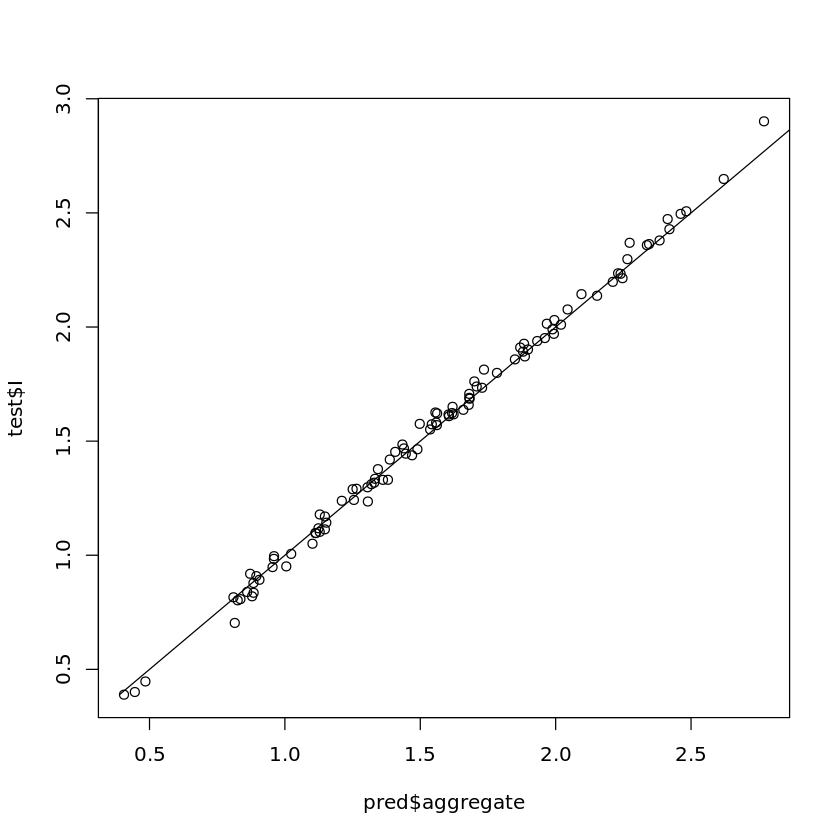

In [24]:
test$I <- test$A + test$B + test$C
print(test$I[1])
plot(pred$aggregate,test$I)
lines(test$I,test$I)

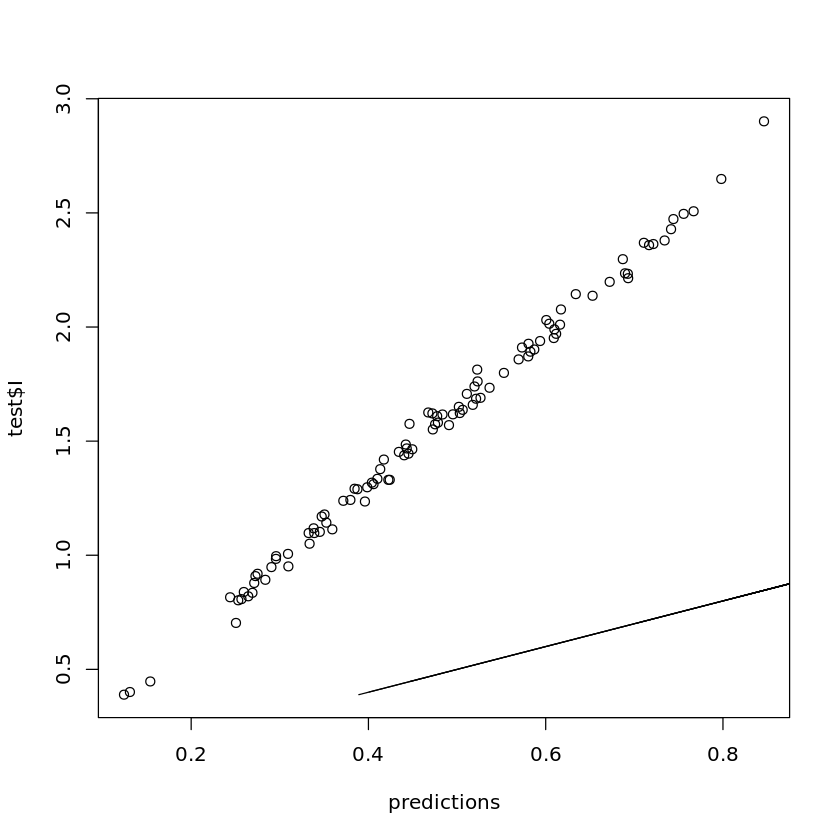

In [25]:
plot(predictions,test$I)
lines(test$I,test$I)